In [28]:
# Python3.6
import numpy as np

from eccentric.synthetic import SyntheticFlares, HotJupiterHost
from eccentric.spimodel import SPI_Model

import matplotlib.pyplot as plt
%matplotlib inline

### Create a Hot Jupiter host and a time series observations:

In [57]:

sf = SyntheticFlares(hjhost=HotJupiterHost(period=15, a=1., e=.3, first_periastron_time=7000.,), 
                     #period in days, a in AU, first periastron time must occur after first_observation time...
                     observation_deltat=105, # in days
                     cadence=6, #observations per hour
                     flares_per_day=.1, #in days^-1
                     first_observation_time=6999)# day
print("Observation time series: ", sf.observation_time[:5], 
      "\nPoisson parameter for the time series converted from flares_per_day: ", sf.poisson_parameter)

Observation time series:  [6999.         6999.00694444 6999.01388889 6999.02083333 6999.02777778] 
Poisson parameter for the time series converted from flares_per_day:  0.0006944444444444445


### Generate some synthetic flares

The default model is a Gaussian distribution at phase $\phi=0.7$, when periastron is at $\phi=0.5$.

In [58]:
phase = .7
sf.generate_synthetic_flares(model="Gauss",
                             size=5, # number of SPI flares per periastron passage
                             width=0.02, # in days (standard deviation)
                             phase=phase) #  can be chosen from 0 to 1


In [59]:
sf.all_flares.head()

,source,peak_time,stacked_peak_time
0,intrinsic,7001.513889,0.167593
1,intrinsic,7013.555556,0.970370
2,intrinsic,7068.895833,0.659722
3,intrinsic,7072.555556,0.903704
4,intrinsic,7079.416667,0.361111


### Instantiate a model for flaring SPI with given data

In [60]:
spi = SPI_Model(major_axis_a=sf.hjhost.major_axis_a,
                eccentricity=sf.hjhost.eccentricity,
                data=sf.all_flares.stacked_peak_time,
                n_orbits=sf.observation_deltat / sf.hjhost.period)

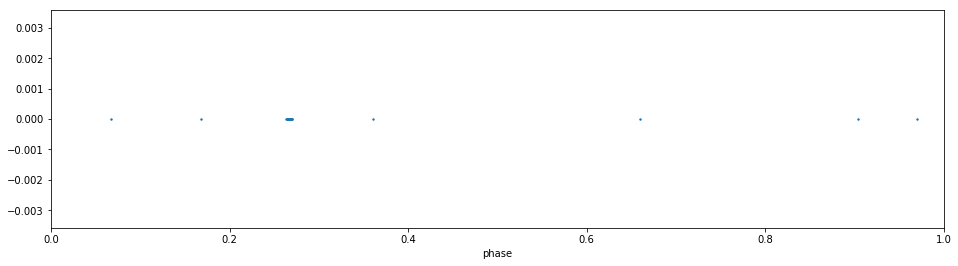

In [61]:
plt.figure(figsize=(16,4))
plt.scatter(sf.all_flares.stacked_peak_time, len(sf.all_flares.stacked_peak_time)*[0], s=2)
plt.xlabel("phase")
plt.xlim(0,1);

In [62]:
a, b = spi.estimate_two_parameters()
a, b
# gives base intensity and peak scaling factor

(3.8336190691184924, 4.3641223796941)

In [63]:
spi.thinning()


In [64]:
len(spi.hom), len(spi.inhom)

(29, 7)

In [65]:
model = spi.intensity_function()

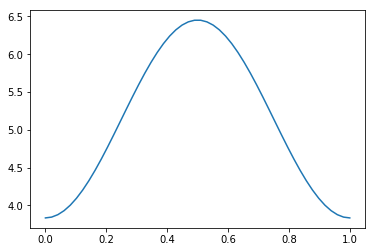

In [66]:
x = np.linspace(0,1,50)
plt.plot(x, model(x, a, b, sf.hjhost.eccentricity, sf.hjhost.major_axis_a))

In [8]:
# Wann ist der Peak?
# What if I do not have full periods covered?

In [71]:
np.random.exponential(1e-3)

0.0020665634103494727

In [72]:
np.random.poisson(lam = .2,
                                      size = 1000)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 4, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,